In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
phones = pd.read_csv('train.csv')
phones

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
len(phones)

2000

In [6]:
phones['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Figure size 640x480 with 0 Axes>

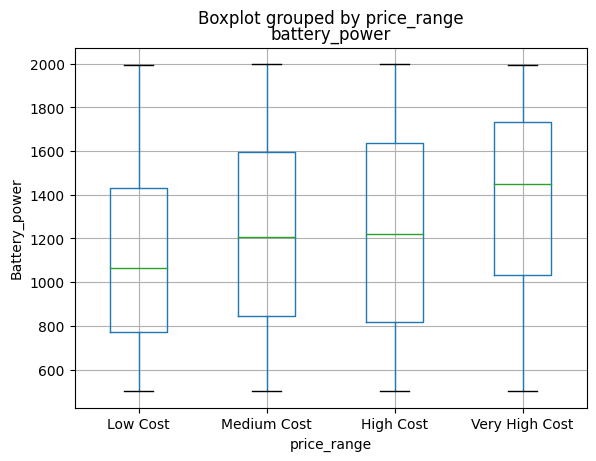

<Figure size 640x480 with 0 Axes>

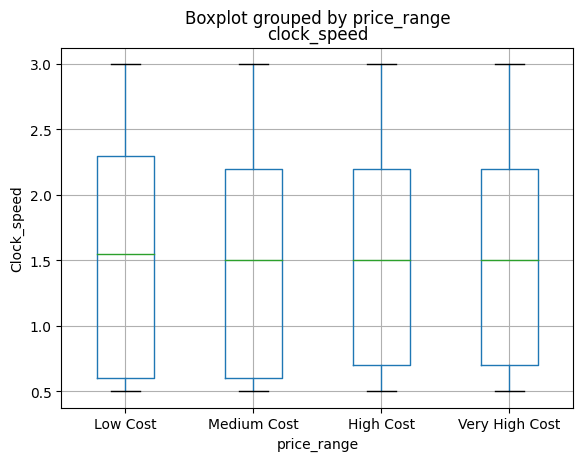

<Figure size 640x480 with 0 Axes>

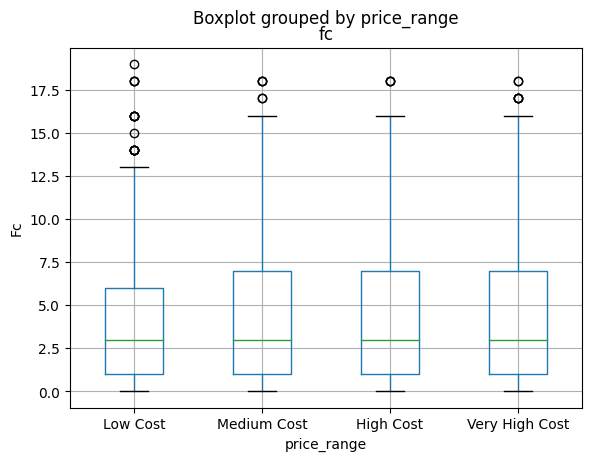

<Figure size 640x480 with 0 Axes>

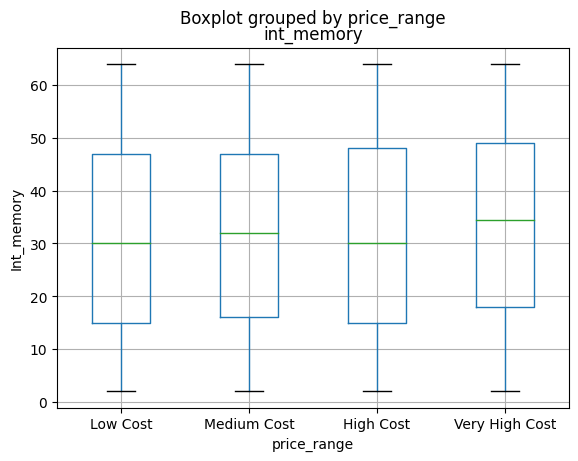

<Figure size 640x480 with 0 Axes>

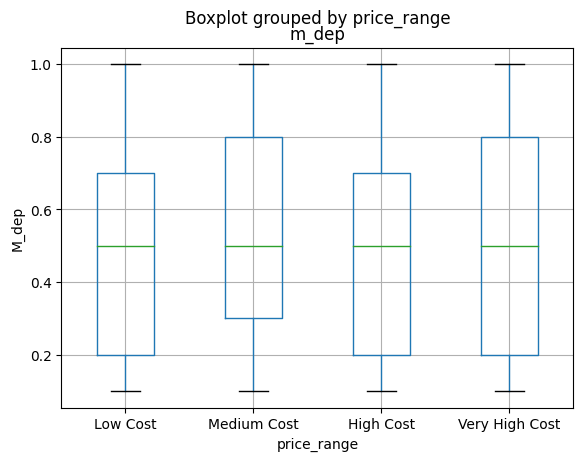

<Figure size 640x480 with 0 Axes>

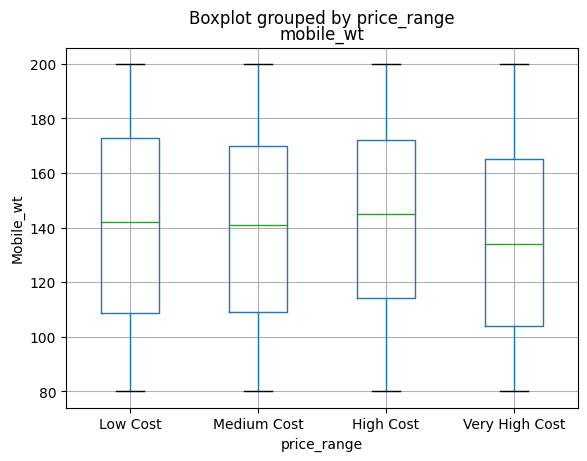

<Figure size 640x480 with 0 Axes>

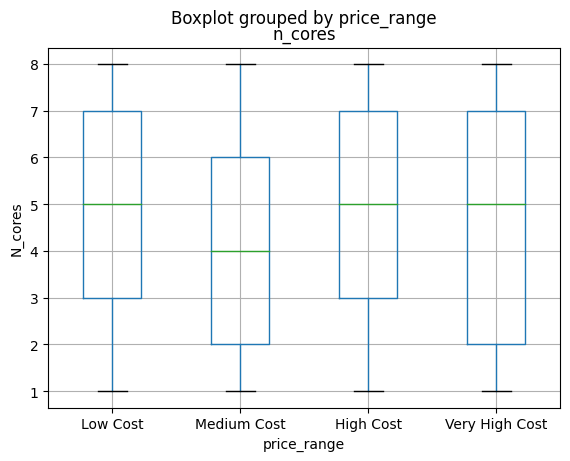

<Figure size 640x480 with 0 Axes>

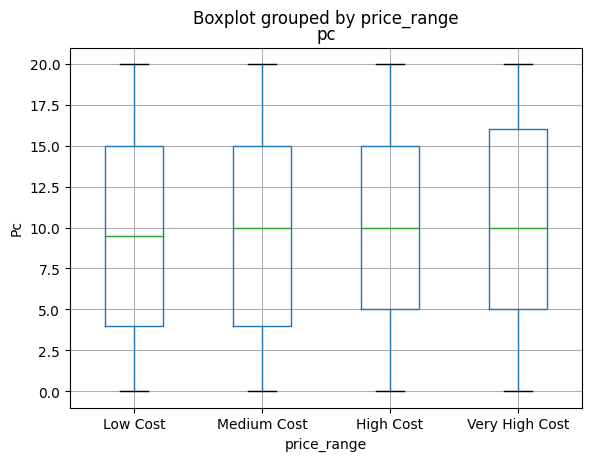

<Figure size 640x480 with 0 Axes>

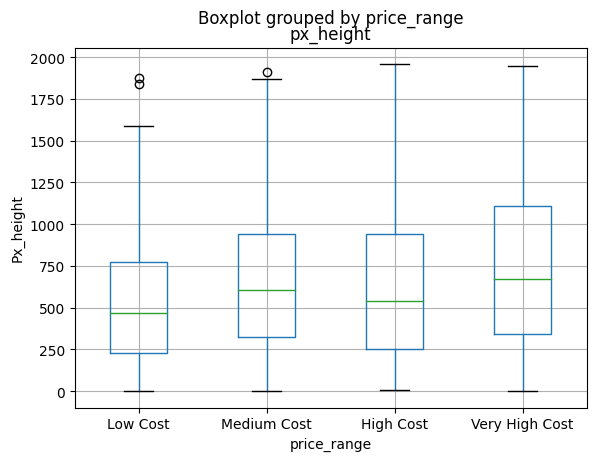

<Figure size 640x480 with 0 Axes>

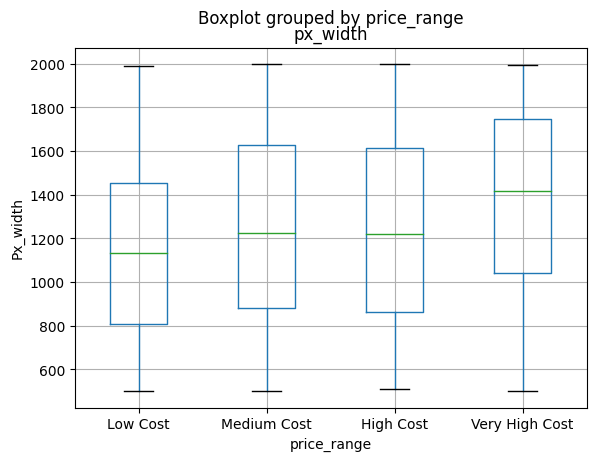

<Figure size 640x480 with 0 Axes>

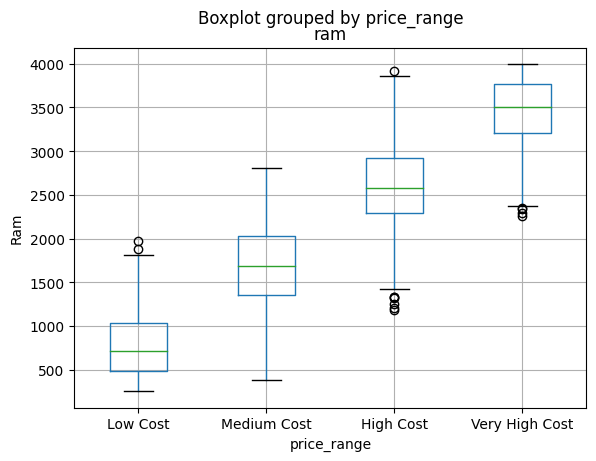

<Figure size 640x480 with 0 Axes>

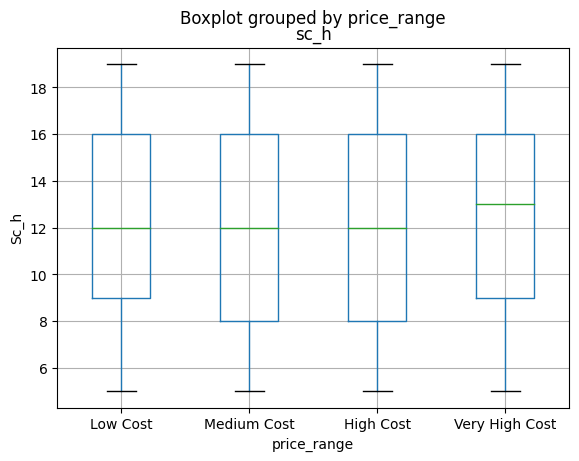

<Figure size 640x480 with 0 Axes>

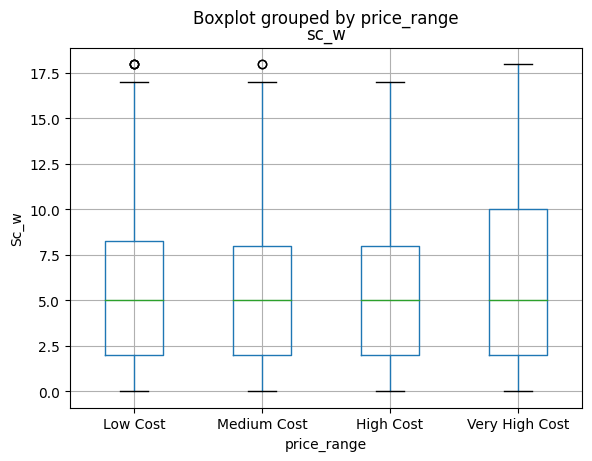

<Figure size 640x480 with 0 Axes>

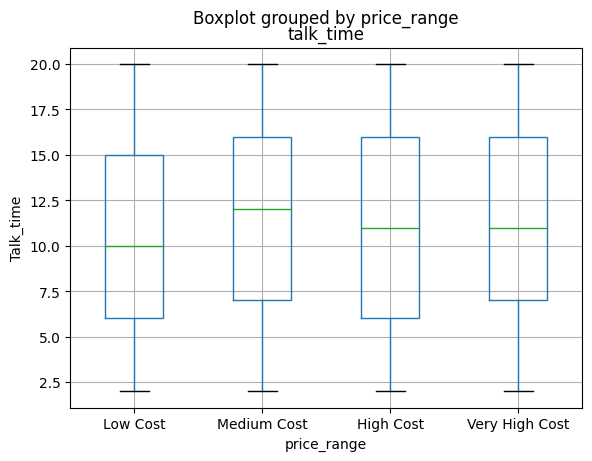

In [22]:
# List of features to plot
features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Loop over the features and create a boxplot for each feature by price range
for feature in features:
    plt.figure()
    phones.boxplot(column=feature, by='price_range')
    plt.ylabel(feature.capitalize())
    plt.xticks([1, 2, 3, 4], ['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
    plt.show()

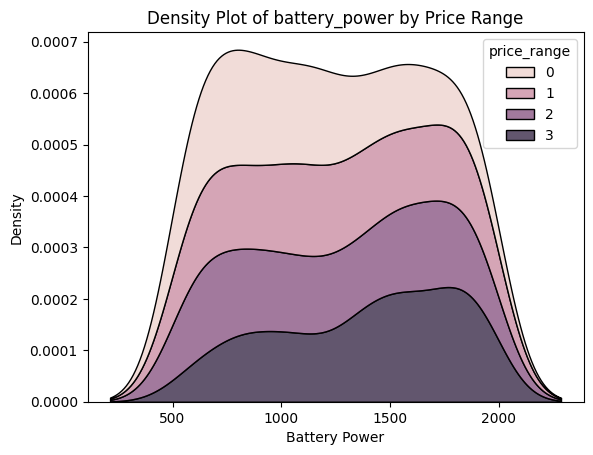

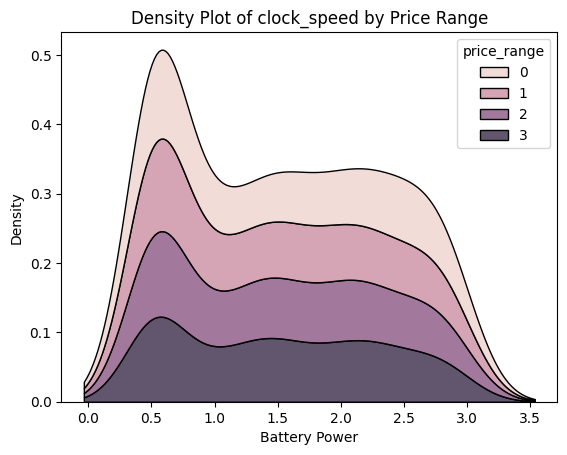

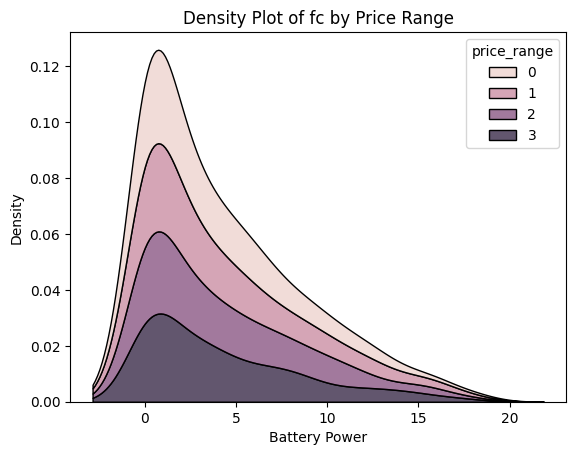

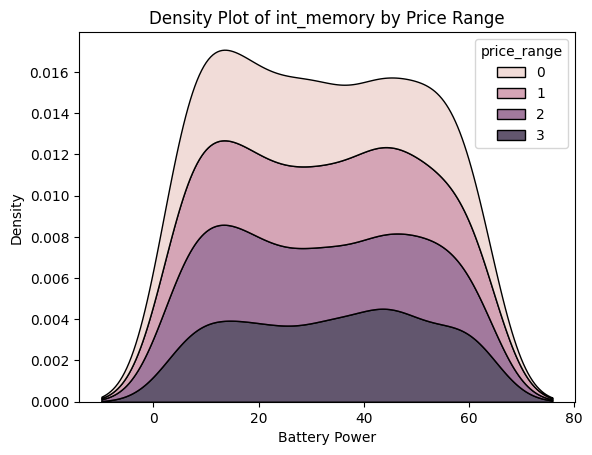

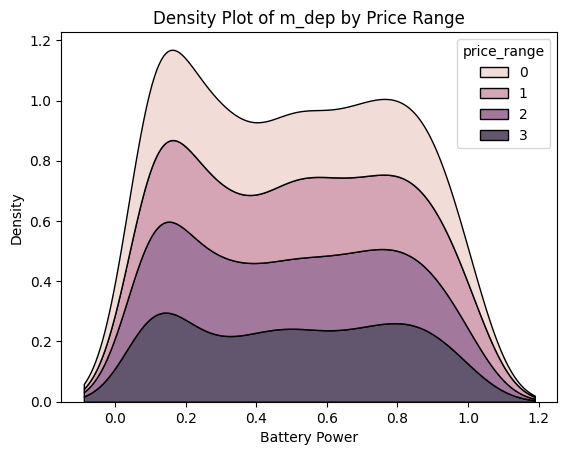

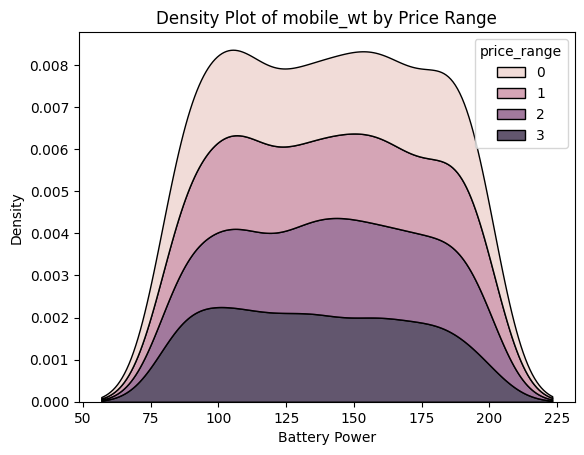

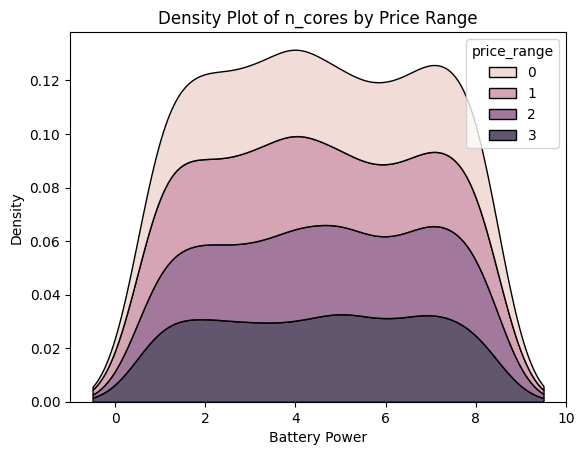

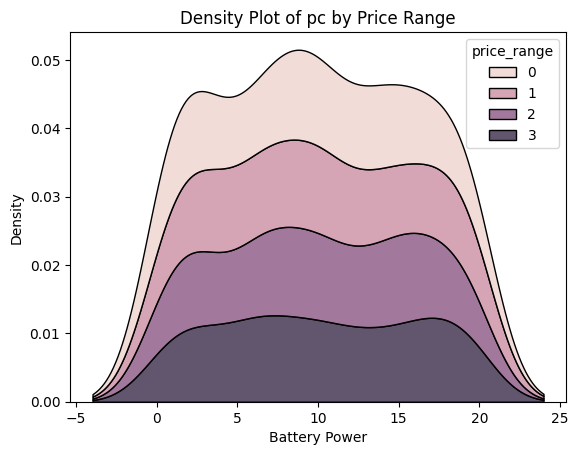

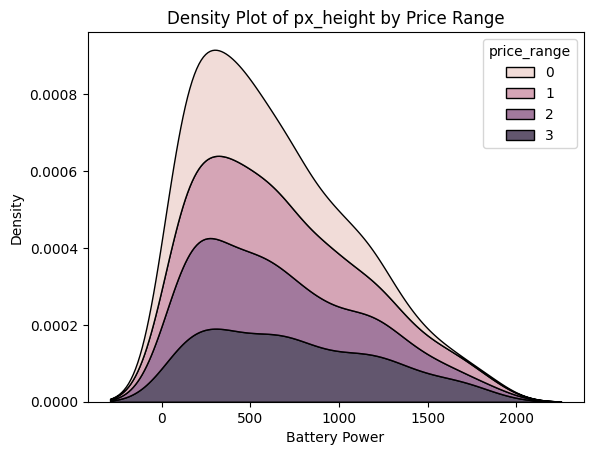

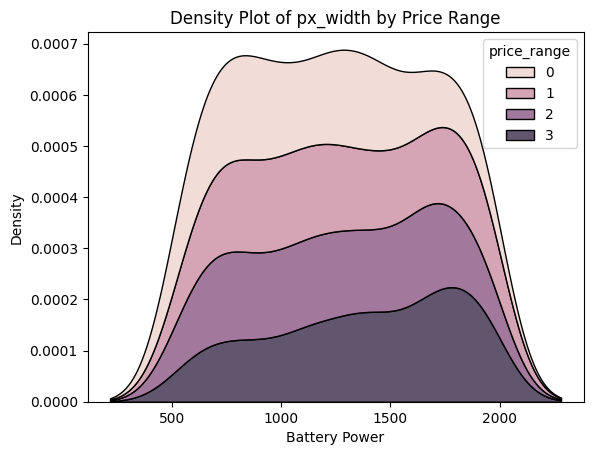

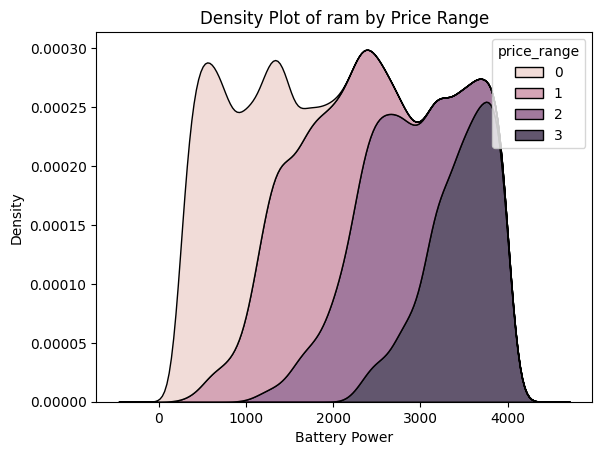

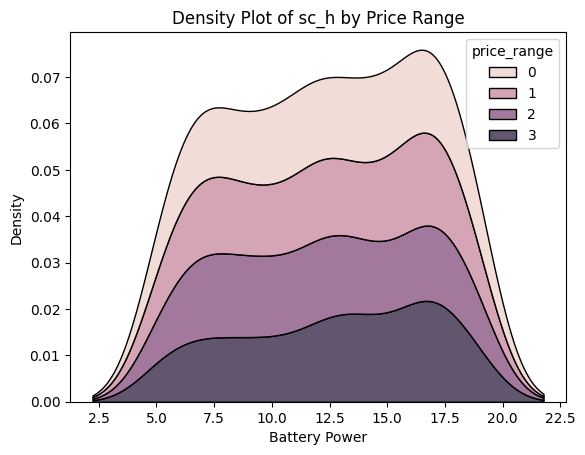

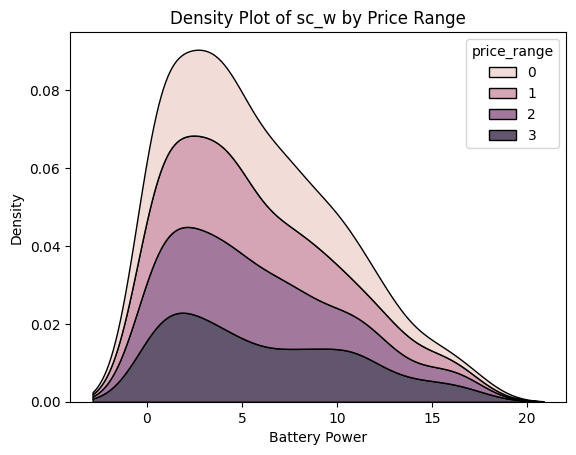

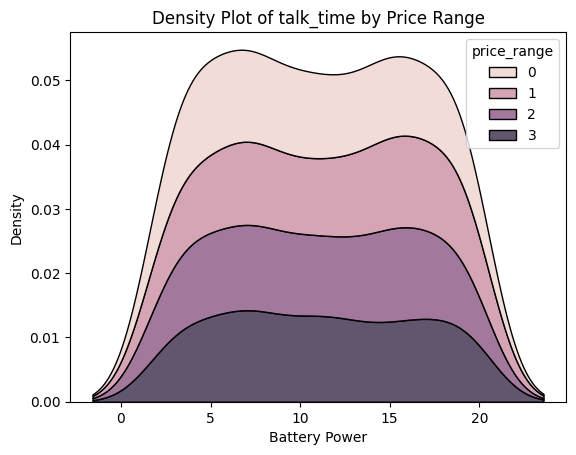

In [49]:
#looks cool but idk how to read this

features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for feature in features:
    sns.kdeplot(data=phones, x=feature, hue='price_range', multiple='stack', fill=True)
    plt.xlabel('Battery Power')
    plt.title('Density Plot of ' + feature+ ' by Price Range')
    plt.show()

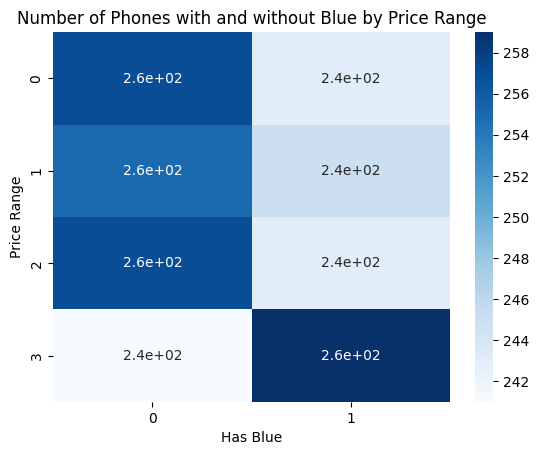

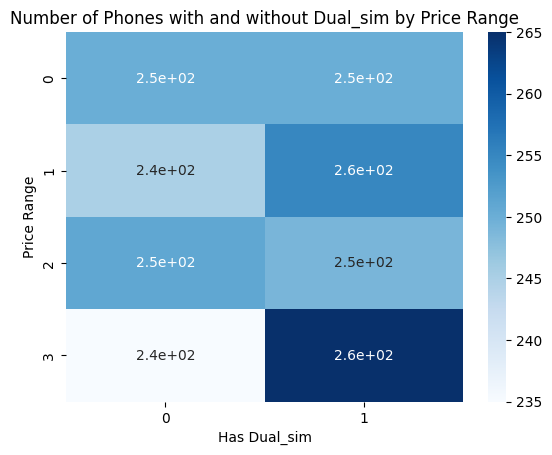

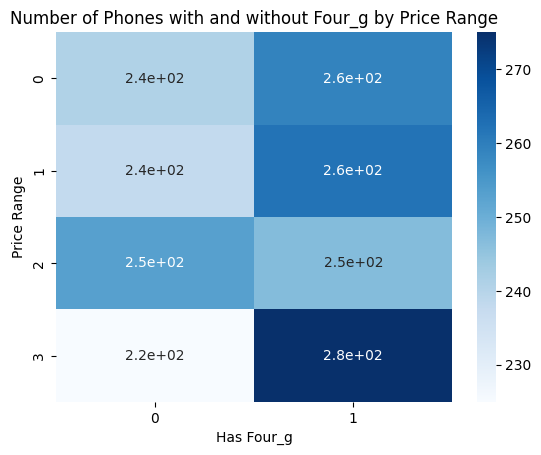

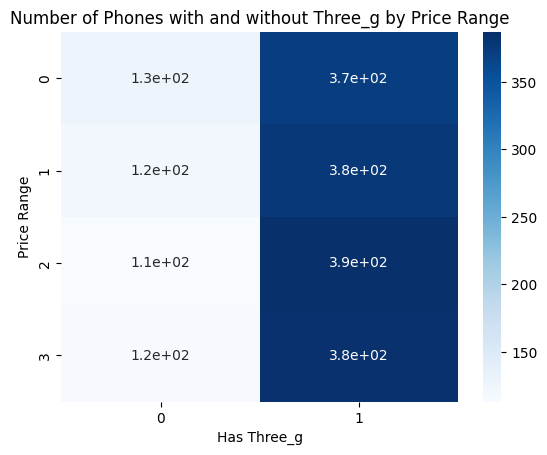

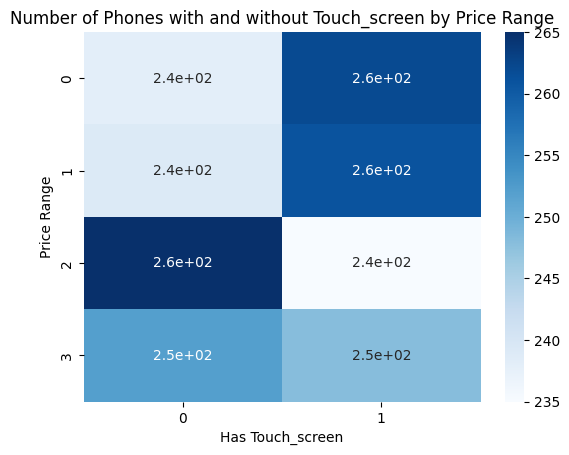

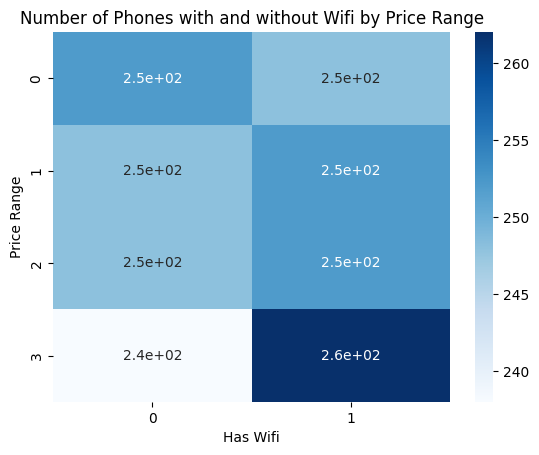

In [36]:
features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for feature in features:
    # Group the phones by price range and the presence of the feature, and count the number of phones in each group
    counts = phones.groupby(['price_range', feature]).size().unstack()

    # Plot the heatmap of the counts of phones with and without the feature for each price range
    sns.heatmap(counts, annot=True, cmap='Blues')

    # Set the title, x-axis label, y-axis label, and legend
    plt.title('Number of Phones with and without ' + feature.capitalize() + ' by Price Range')
    plt.xlabel('Has ' + feature.capitalize())
    plt.ylabel('Price Range')

    # Show the plot
    plt.show()

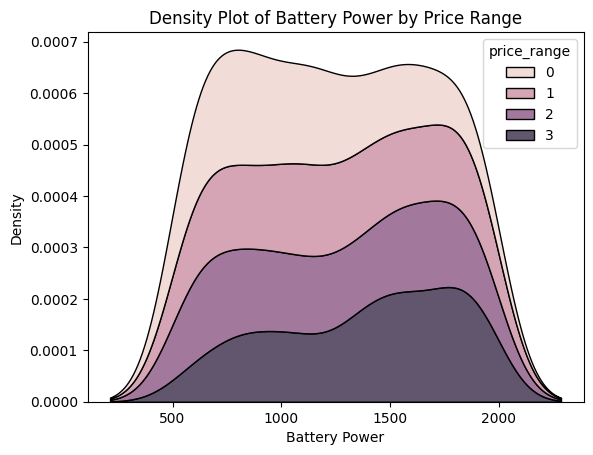

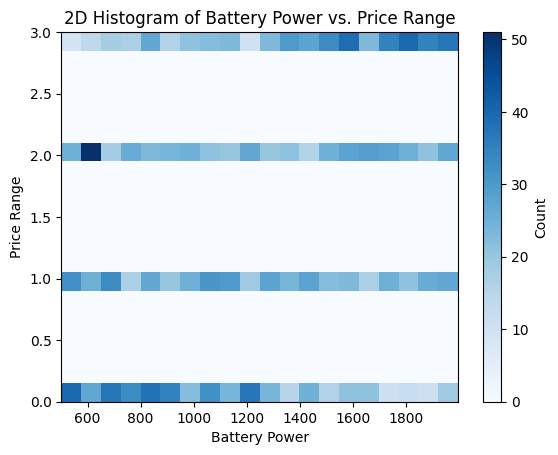

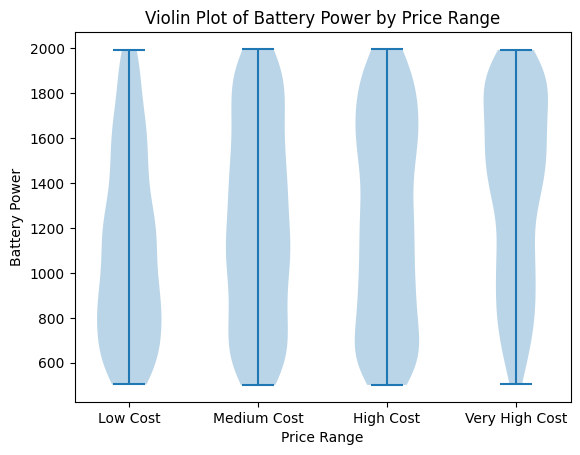

In [50]:
sns.kdeplot(data=phones, x='battery_power', hue='price_range', multiple='stack', fill=True)
plt.xlabel('Battery Power')
plt.title('Density Plot of Battery Power by Price Range')
plt.show()

plt.hist2d(phones['battery_power'], phones['price_range'], bins=20, cmap='Blues')
plt.xlabel('Battery Power')
plt.ylabel('Price Range')
plt.title('2D Histogram of Battery Power vs. Price Range')
cb = plt.colorbar()
cb.set_label('Count')
plt.show()

plt.violinplot([phones[phones['price_range']==0]['battery_power'], phones[phones['price_range']==1]['battery_power'], phones[phones['price_range']==2]['battery_power'], phones[phones['price_range']==3]['battery_power']])
plt.xticks([1, 2, 3, 4], ['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Violin Plot of Battery Power by Price Range')
plt.show()
